In [1]:
import pandas as pd


In [2]:
weather = pd.read_csv('2022weather1.csv')

weather.head()

,Date,Temperature,precipitation (mm),Wind Speed (m/s),Humidity (%),Pressure (hPa),Condition
0,2022-01-01,-4.3,NaN,1.5,46.3,1019.8,clear
1,2022-01-02,-1.3,0.3,2.3,57.9,1015.7,snow
2,2022-01-03,-1.9,0.1,1.8,58.3,1015.3,snow
3,2022-01-04,-2.5,0.1,2.4,51.8,1017.3,snow
4,2022-01-05,-2.8,NaN,1.7,47.6,1016.9,clouds


In [3]:
weather = weather.fillna(0)

In [4]:
weather

,Date,Temperature,precipitation (mm),Wind Speed (m/s),Humidity (%),Pressure (hPa),Condition
0,2022-01-01,-4.3,0.0,1.5,46.3,1019.8,clear
1,2022-01-02,-1.3,0.3,2.3,57.9,1015.7,snow
2,2022-01-03,-1.9,0.1,1.8,58.3,1015.3,snow
3,2022-01-04,-2.5,0.1,2.4,51.8,1017.3,snow
4,2022-01-05,-2.8,0.0,1.7,47.6,1016.9,clouds
...,...,...,...,...,...,...,...
13499,2022-12-27,7.5,0.0,1.5,72.1,1020.7,clouds
13500,2022-12-28,6.7,0.0,1.3,61.5,1022.3,clouds
13501,2022-12-29,5.9,0.0,1.2,67.3,1025.1,clouds
13502,2022-12-30,5.9,0.0,1.2,61.1,1025.1,clouds


In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Sequential

# Convert weather conditions to numerical labels
label_encoder = LabelEncoder()
weather['Condition_Label'] = label_encoder.fit_transform(weather['Condition'])

# Select features and labels
features = weather[['Temperature', 'precipitation (mm)', 'Humidity (%)', 'Pressure (hPa)', 'Wind Speed (m/s)']]
labels = weather['Condition_Label']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Define the model with Dropout
model = Sequential([
    Dense(32, activation='tanh', input_shape=(features_scaled.shape[1],)),
    #Dropout(0.2),  # Add Dropout after the first Dense layer with a dropout rate of 0.5
    Dense(16, activation='tanh'),
    #Dropout(0.2),  # Add Dropout after the second Dense layer with a dropout rate of 0.5
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/100
136/136 [==============================] - 1s 3ms/step - loss: 1.0934 - accuracy: 0.4868 - val_loss: 0.9255 - val_accuracy: 0.5715
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 0.8913 - accuracy: 0.5839 - val_loss: 0.8765 - val_accuracy: 0.5886
Epoch 3/100
136/136 [==============================] - 0s 2ms/step - loss: 0.8536 - accuracy: 0.6029 - val_loss: 0.8442 - val_accuracy: 0.6081
Epoch 4/100
136/136 [==============================] - 0s 2ms/step - loss: 0.8303 - accuracy: 0.6106 - val_loss: 0.8233 - val_accuracy: 0.6071
Epoch 5/100
136/136 [==============================] - 0s 2ms/step - loss: 0.8129 - accuracy: 0.6193 - val_loss: 0.8073 - val_accuracy: 0.6168
Epoch 6/100
136/136 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.6274 - val_loss: 0.7928 - val_accuracy: 0.6298
Epoch 7/100
136/136 [==============================] - 0s 2ms/step - loss: 0.7857 - accuracy: 0.6386 - val_loss: 0.7833 - val_accuracy: 0.6266

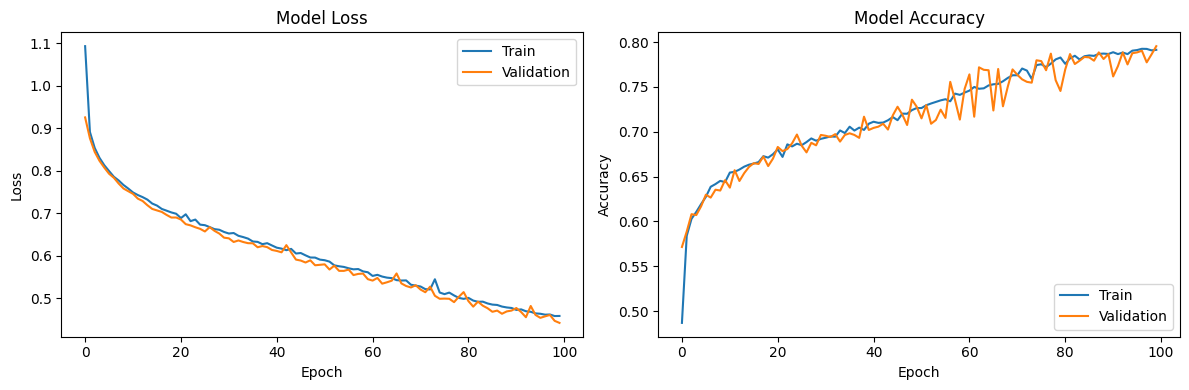

In [15]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [7]:
condition_counts = weather['Condition'].value_counts()
print(condition_counts)

Condition
clouds    5611
rain      4149
clear     3112
snow       632
Name: count, dtype: int64


In [8]:
unique_conditions = weather['Condition'].unique()
print(unique_conditions)

['clear' 'snow' 'clouds' 'rain']
